# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Functions to detect & plot Outliers with different approaches:

def zscore_based_outliers(ys, threshold = 3):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.abs(z_scores) > threshold

def mad_based_outlier(ys, thresh=3.5):
    median = np.median(ys, axis=0)
    mad=np.median(np.array([np.abs(y - median)  for y in ys]))
    modified_z_score=[0.6745 *(y - median) / mad for y in ys]
    return np.abs(modified_z_score) > thresh

def iqr_based_outliers(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = np.abs(quartile_3 - quartile_1)
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (ys > upper_bound) | (ys < lower_bound)

def plot_outliers(x):
    fig, axes = plt.subplots(nrows=3)
    fig.set_size_inches(6, 6)
    for ax, func in zip(axes, [zscore_based_outliers, mad_based_outlier, iqr_based_outliers]):
        sns.distplot(x, ax=ax, rug=True, hist=True)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    
    axes[0].set_title('Zscore-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('IQR-based Outliers', **kwargs)
    
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [3]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/wine quality/winequality-red.csv', sep=';')

# Note: I define 3 different wine quality: Low, Medium, High 

In [4]:
df['quality']=df['quality'].map({3:'L', 4:'L', 5:'M', 6:'M', 7:'H', 8:'H'})
df['quality']=df['quality'].map({'L':1,  'M':2, 'H':3})

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


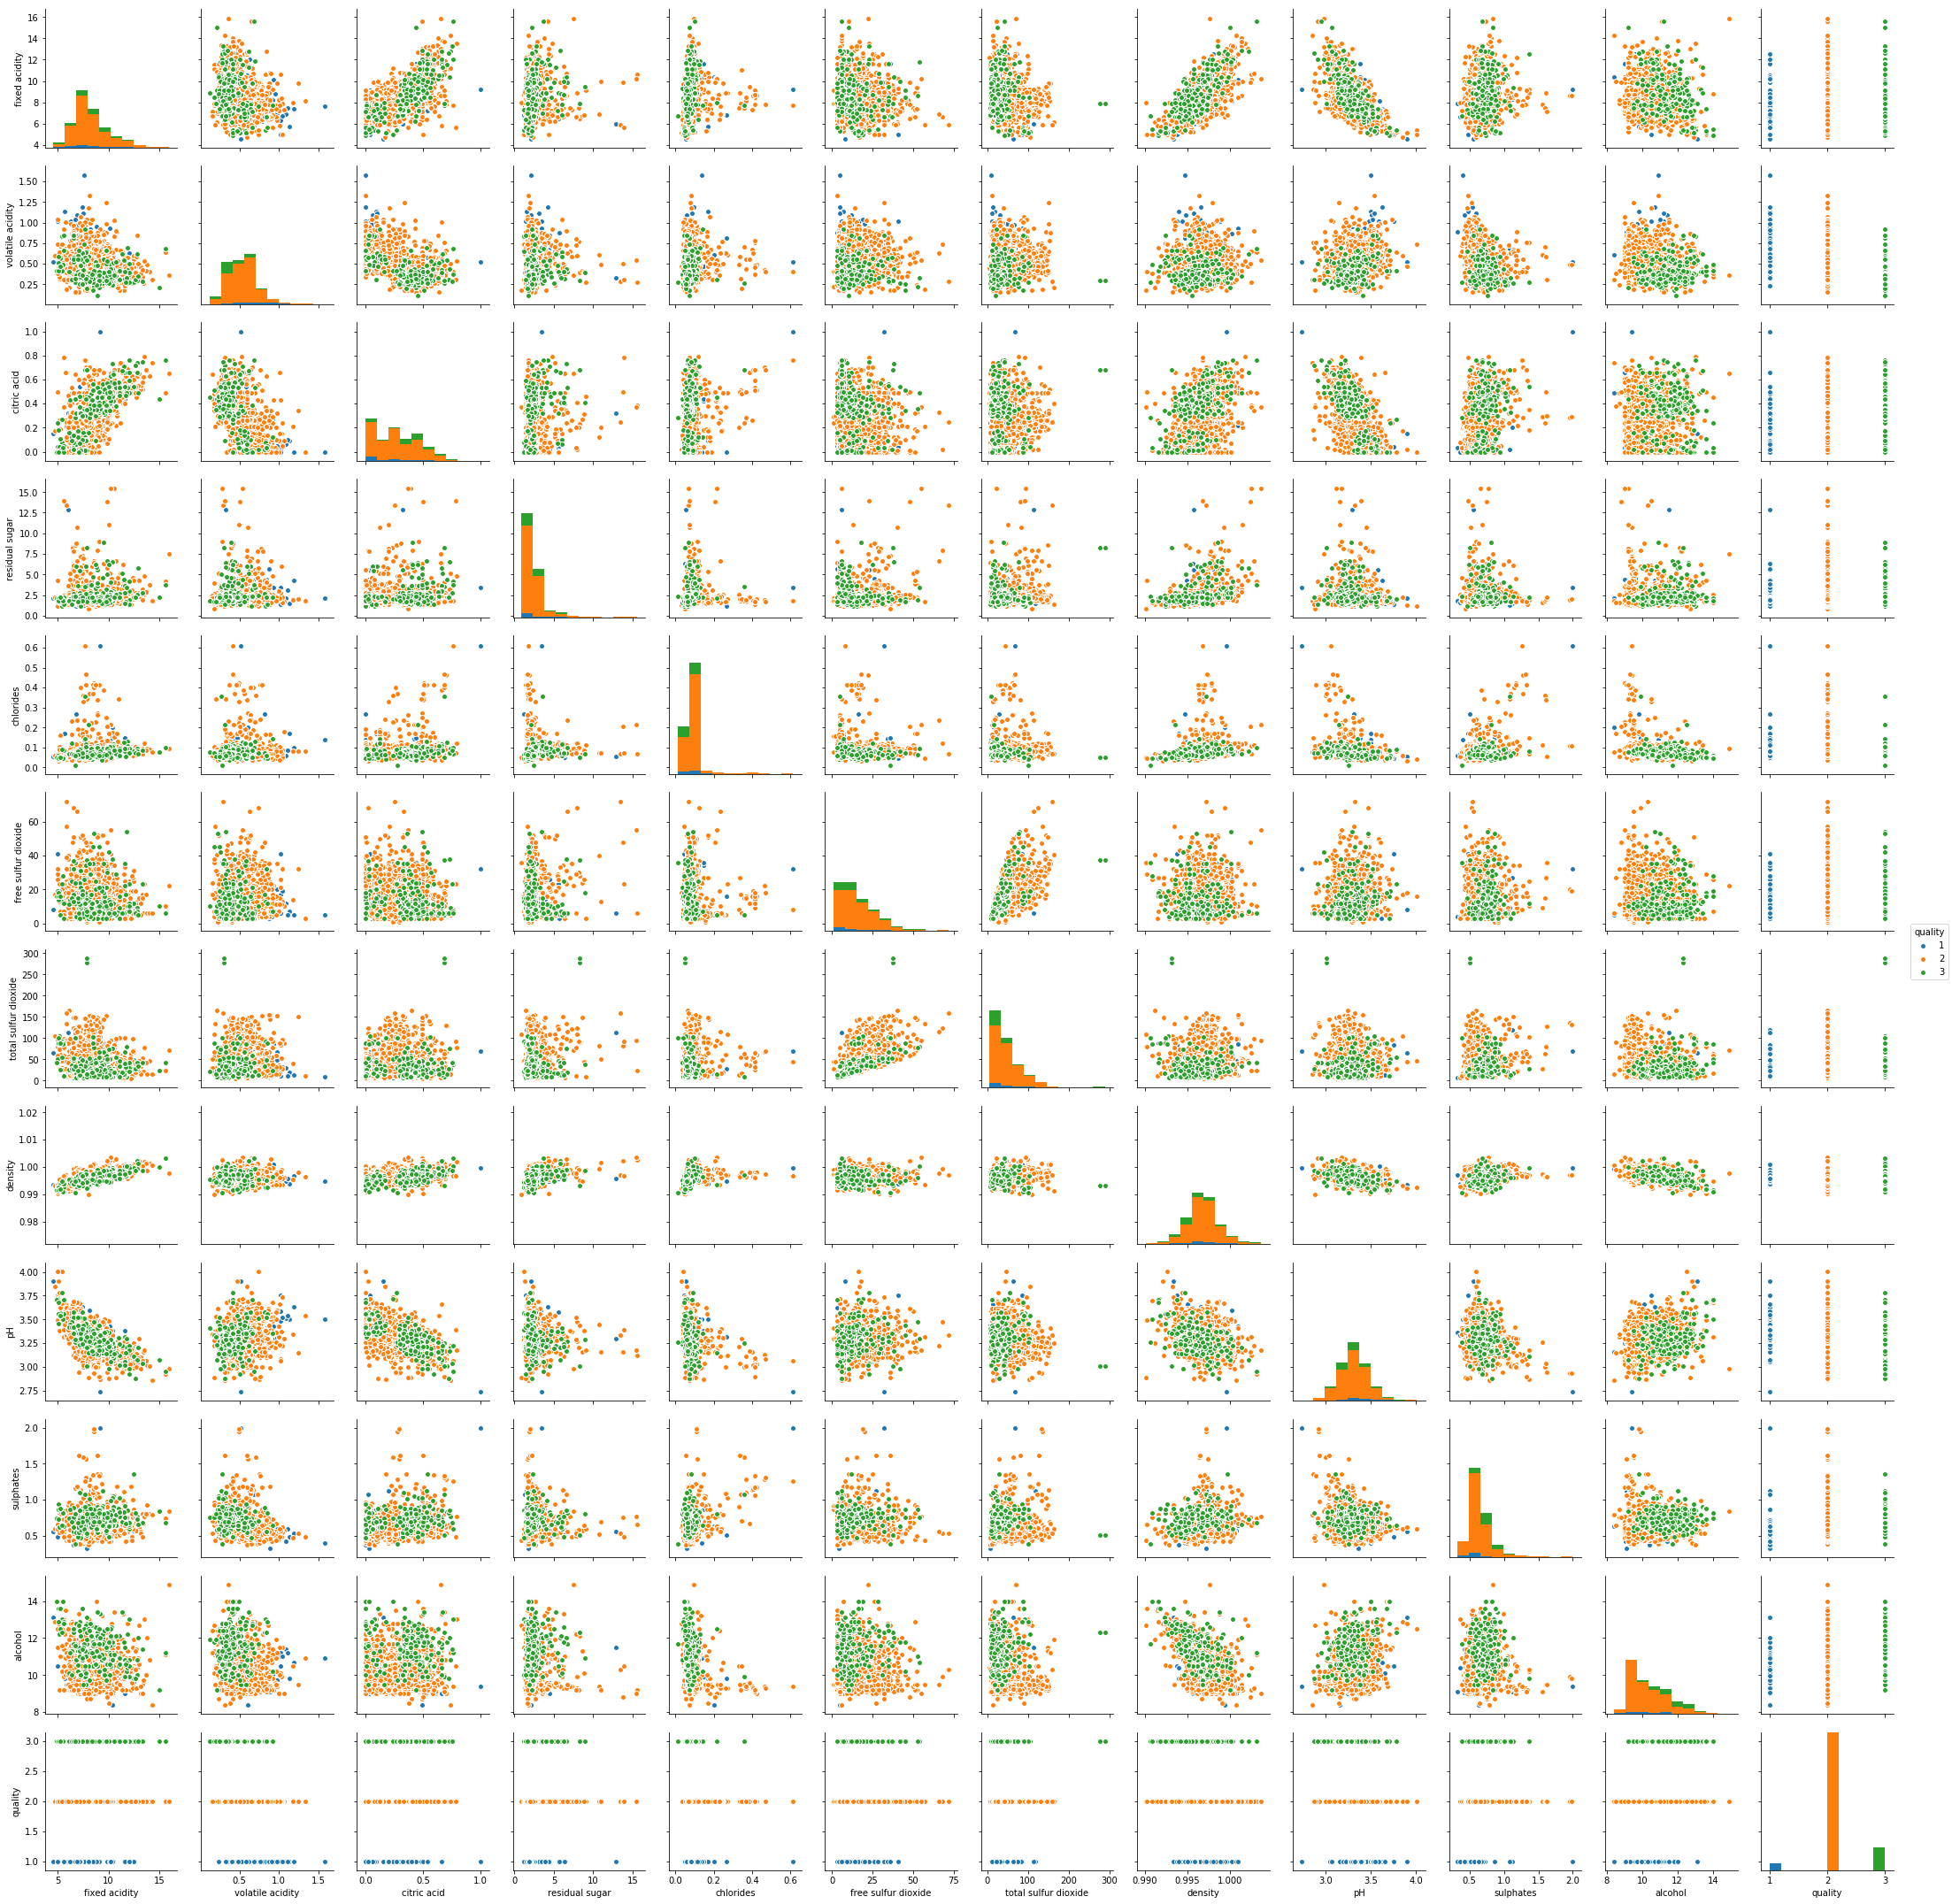

In [6]:
# Multi-variable analysis of Continuous Features: Pairplot of all continuous features for different classes of target
sns.pairplot(df, hue='quality')

______________________________________________________________________
variable name:  fixed acidity 

Statistical description: 
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

Skewness =  0.9827514413284587
Kurtosis =  1.1321433977276252


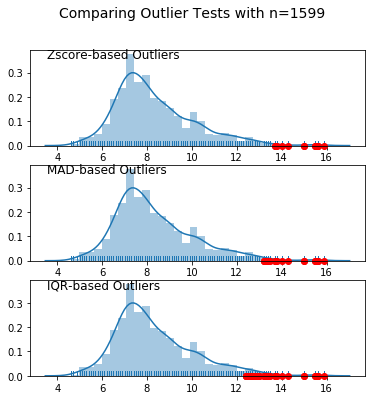

______________________________________________________________________
variable name:  volatile acidity 

Statistical description: 
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

Skewness =  0.6715925723840199
Kurtosis =  1.2255422501791422


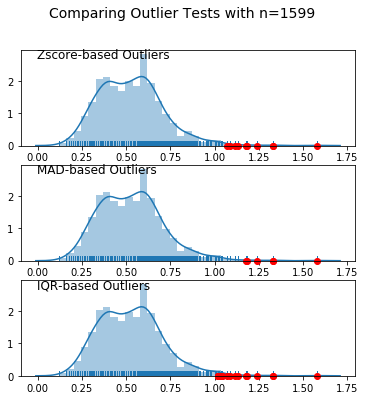

______________________________________________________________________
variable name:  citric acid 

Statistical description: 
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

Skewness =  0.3183372952546368
Kurtosis =  -0.7889975153633966


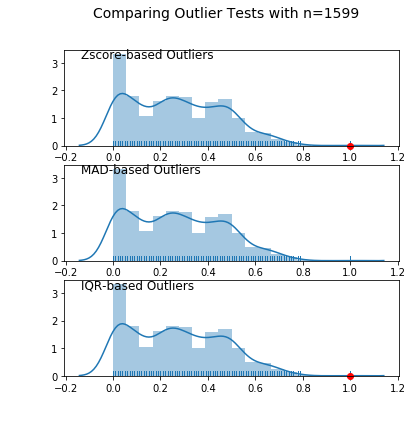

______________________________________________________________________
variable name:  residual sugar 

Statistical description: 
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Skewness =  4.54065542590319
Kurtosis =  28.617595424475443


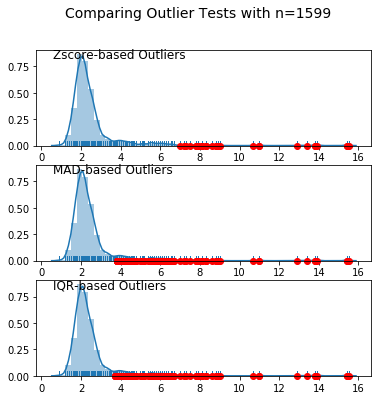

______________________________________________________________________
variable name:  chlorides 

Statistical description: 
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

Skewness =  5.680346571971722
Kurtosis =  41.71578724757661


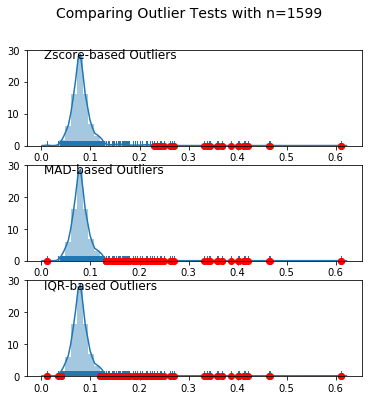

______________________________________________________________________
variable name:  free sulfur dioxide 

Statistical description: 
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

Skewness =  1.250567293314441
Kurtosis =  2.023562045840575


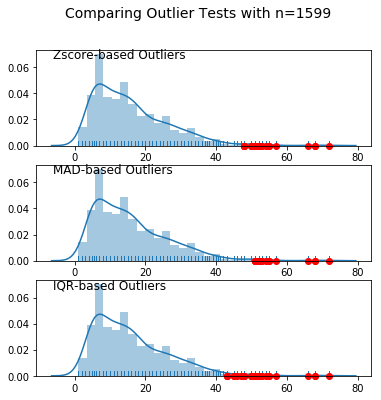

______________________________________________________________________
variable name:  total sulfur dioxide 

Statistical description: 
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

Skewness =  1.515531257594554
Kurtosis =  3.8098244878645744


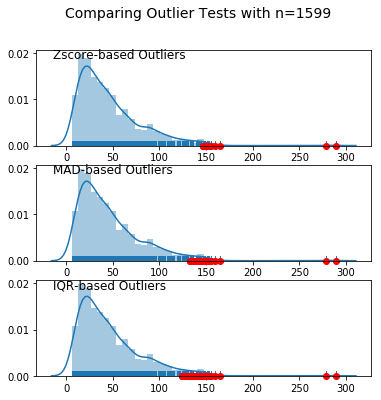

______________________________________________________________________
variable name:  density 

Statistical description: 
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

Skewness =  0.07128766294945525
Kurtosis =  0.9340790654648083


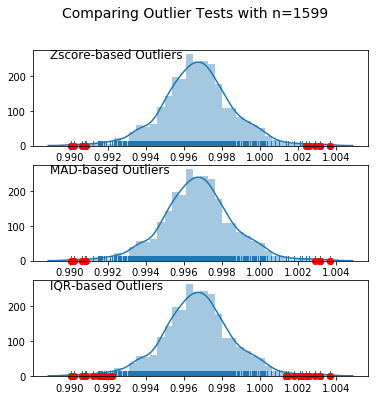

______________________________________________________________________
variable name:  pH 

Statistical description: 
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

Skewness =  0.19368349811284427
Kurtosis =  0.806942508246574


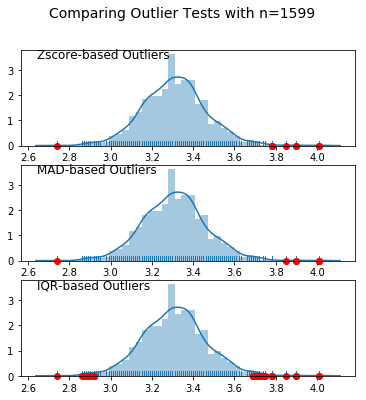

______________________________________________________________________
variable name:  sulphates 

Statistical description: 
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

Skewness =  2.4286723536602945
Kurtosis =  11.720250727147674


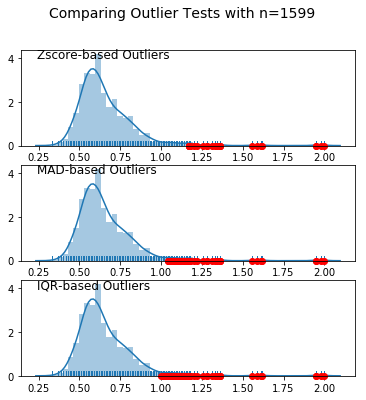

______________________________________________________________________
variable name:  alcohol 

Statistical description: 
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

Skewness =  0.8608288068888538
Kurtosis =  0.2000293113417695


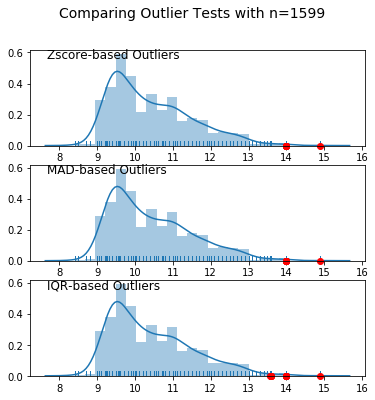

In [14]:
# Univariate analysis of Continuous Faetures: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
L=[]
for i in df.columns[:-1]:
    print('_'*70 )
    print('variable name: ', i, '\n')
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    if df[i].min()==0: 
        L.append(i)
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    plot_outliers(np.array(df[i]))
    plt.show()

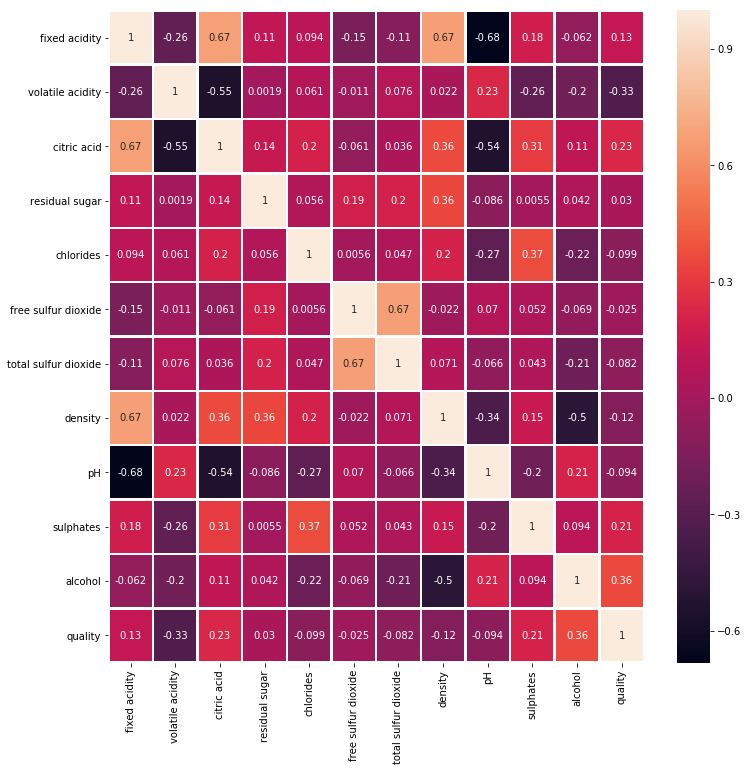

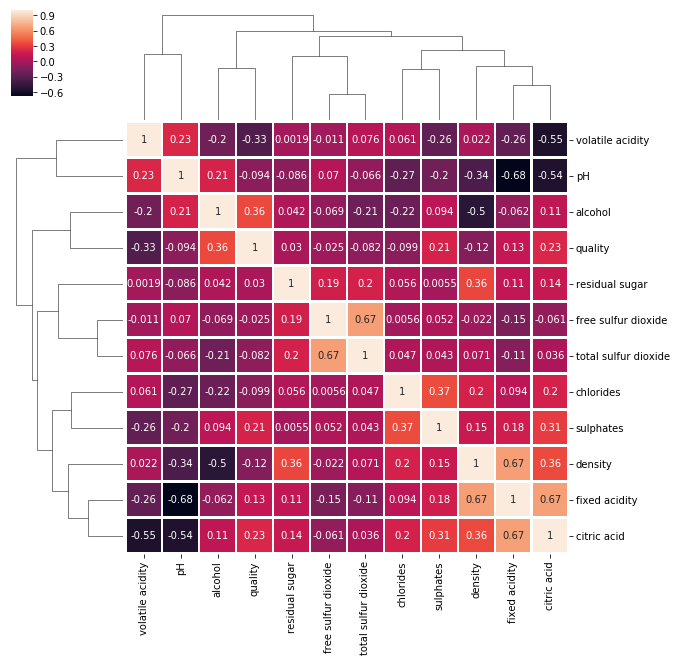

In [8]:
# Multivariable study: heatmap of correlation between continuous features
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True, linewidths=1.5, ax=ax )

sns.clustermap(df.corr(), annot=True,  linewidths=1.5 )

______________________________________________________________________
variable name:  fixed acidity
z_statistic (1-2)=  -1.798
p_value (1-2)=  0.077 

z_statistic (1-3)=  -3.93
p_value (1-3)=  0.0 

z_statistic (2-3)=  -4.132
p_value (2-3)=  0.0


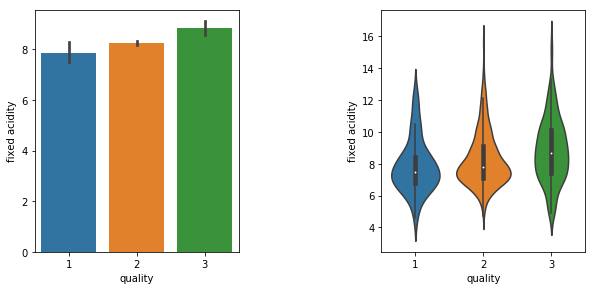

______________________________________________________________________
variable name:  volatile acidity
z_statistic (1-2)=  5.879
p_value (1-2)=  0.0 

z_statistic (1-3)=  9.729
p_value (1-3)=  0.0 

z_statistic (2-3)=  12.238
p_value (2-3)=  0.0


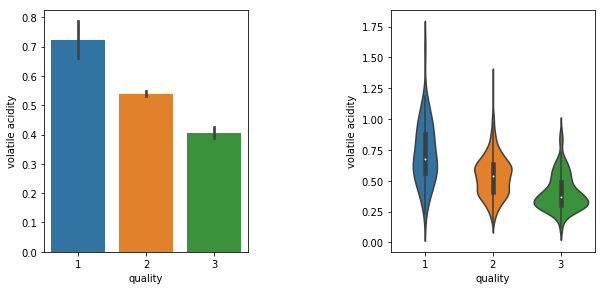

______________________________________________________________________
variable name:  citric acid
z_statistic (1-2)=  -3.176
p_value (1-2)=  0.002 

z_statistic (1-3)=  -6.929
p_value (1-3)=  0.0 

z_statistic (2-3)=  -8.339
p_value (2-3)=  0.0


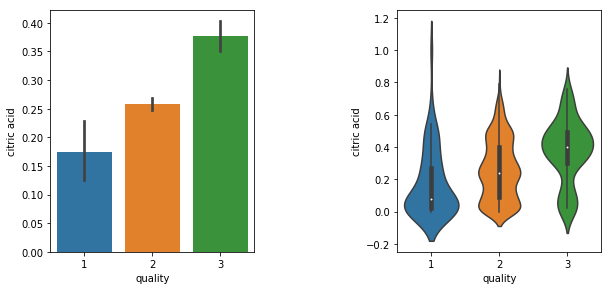

______________________________________________________________________
variable name:  residual sugar
z_statistic (1-2)=  0.821
p_value (1-2)=  0.415 

z_statistic (1-3)=  -0.101
p_value (1-3)=  0.92 

z_statistic (2-3)=  -2.044
p_value (2-3)=  0.042


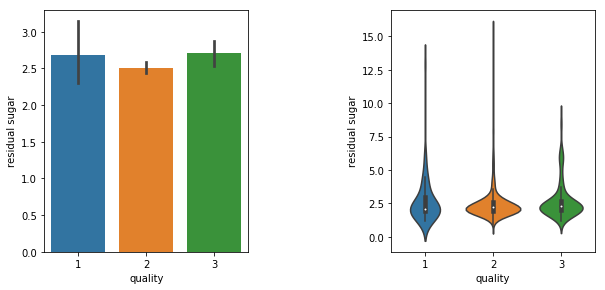

______________________________________________________________________
variable name:  chlorides
z_statistic (1-2)=  0.707
p_value (1-2)=  0.482 

z_statistic (1-3)=  2.052
p_value (1-3)=  0.044 

z_statistic (2-3)=  5.594
p_value (2-3)=  0.0


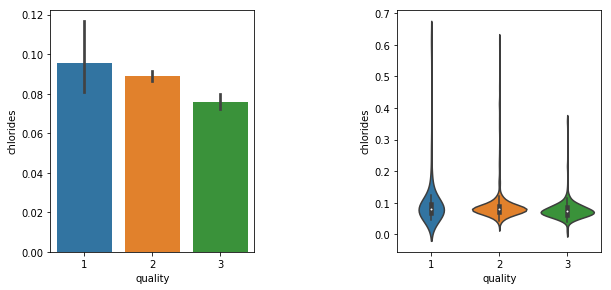

______________________________________________________________________
variable name:  free sulfur dioxide
z_statistic (1-2)=  -3.65
p_value (1-2)=  0.001 

z_statistic (1-3)=  -1.433
p_value (1-3)=  0.155 

z_statistic (2-3)=  3.172
p_value (2-3)=  0.002


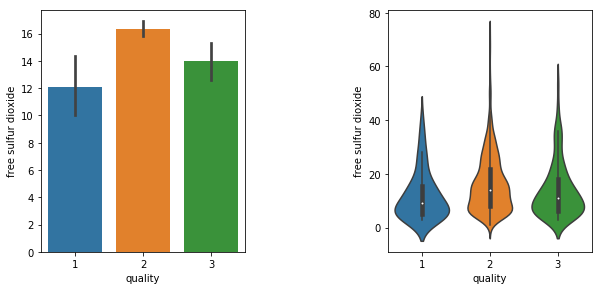

______________________________________________________________________
variable name:  total sulfur dioxide
z_statistic (1-2)=  -4.209
p_value (1-2)=  0.0 

z_statistic (1-3)=  -0.111
p_value (1-3)=  0.911 

z_statistic (2-3)=  5.888
p_value (2-3)=  0.0


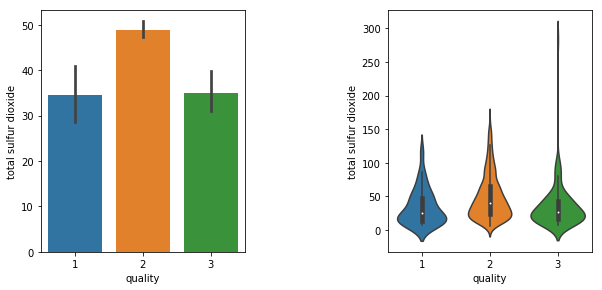

______________________________________________________________________
variable name:  density
z_statistic (1-2)=  -0.827
p_value (1-2)=  0.411 

z_statistic (1-3)=  2.555
p_value (1-3)=  0.012 

z_statistic (2-3)=  5.312
p_value (2-3)=  0.0


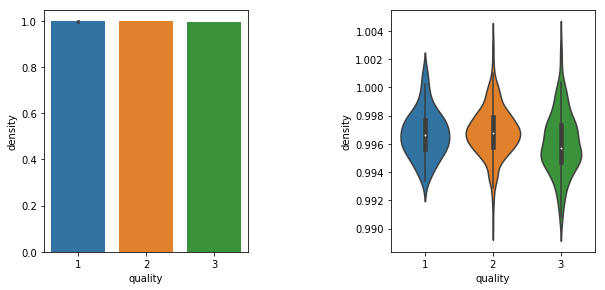

______________________________________________________________________
variable name:  pH
z_statistic (1-2)=  3.243
p_value (1-2)=  0.002 

z_statistic (1-3)=  3.903
p_value (1-3)=  0.0 

z_statistic (2-3)=  1.992
p_value (2-3)=  0.047


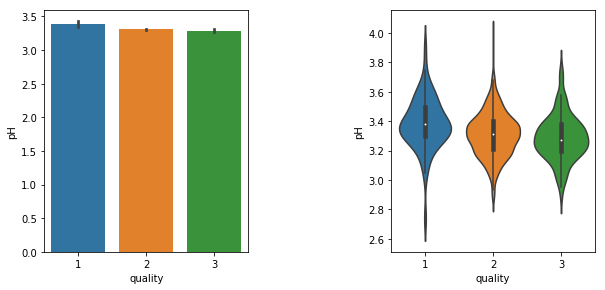

______________________________________________________________________
variable name:  sulphates
z_statistic (1-2)=  -1.922
p_value (1-2)=  0.059 

z_statistic (1-3)=  -5.094
p_value (1-3)=  0.0 

z_statistic (2-3)=  -9.431
p_value (2-3)=  0.0


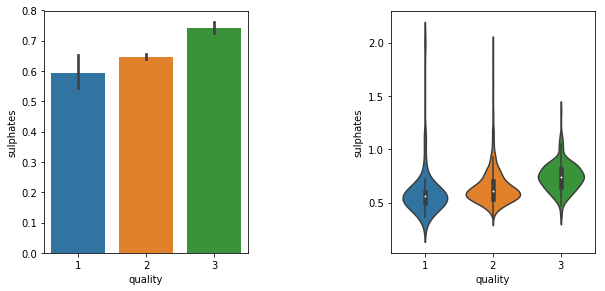

______________________________________________________________________
variable name:  alcohol
z_statistic (1-2)=  -0.31
p_value (1-2)=  0.757 

z_statistic (1-3)=  -9.713
p_value (1-3)=  0.0 

z_statistic (2-3)=  -17.367
p_value (2-3)=  0.0


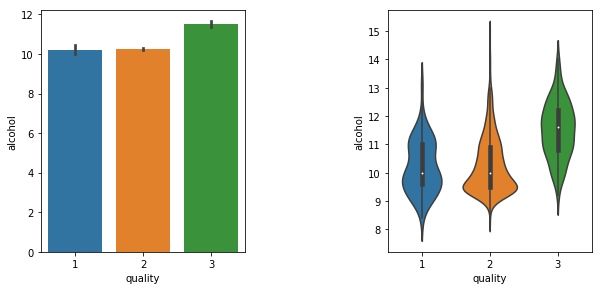

In [13]:
# Multivariable analysis of features: Barplot & Violinplot of each continuous feature for different classes of traget
for i in df.columns[:-1]:
    print('_'*70 )
    print('variable name: ', i)
    
    S1=df[df['quality']==1][i]
    S2=df[df['quality']==2][i]
    S3=df[df['quality']==3][i]
    t_test=stats.ttest_ind(S1, S2, equal_var = False)
    print('z_statistic (1-2)= ', round(t_test[0], 3))
    print('p_value (1-2)= ', round(t_test[1], 3), '\n')
    
    t_test=stats.ttest_ind(S1, S3, equal_var = False)
    print('z_statistic (1-3)= ', round(t_test[0], 3))
    print('p_value (1-3)= ', round(t_test[1], 3), '\n')
    
    t_test=stats.ttest_ind(S2, S3, equal_var = False)
    print('z_statistic (2-3)= ', round(t_test[0], 3))
    print('p_value (2-3)= ', round(t_test[1], 3))
    
    
    fig = plt.figure(figsize=(9, 4))
    
    ax1 = fig.add_subplot(121)
    sns.barplot(x='quality', y=i, data=df)
    
    ax2 = fig.add_subplot(122)
    sns.violinplot( x="quality", y=i, data=df)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.7)
    
    plt.show()

______________________________________________________________________
variable name:  fixed acidity


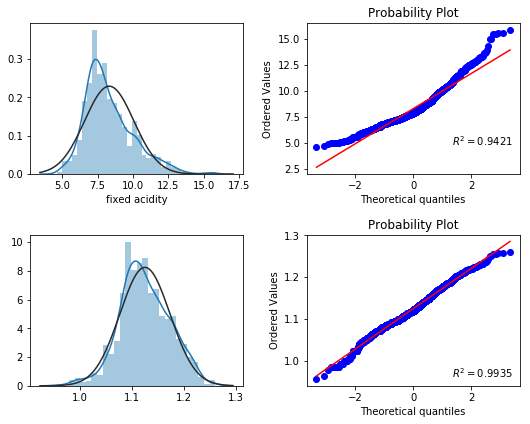

______________________________________________________________________
variable name:  volatile acidity


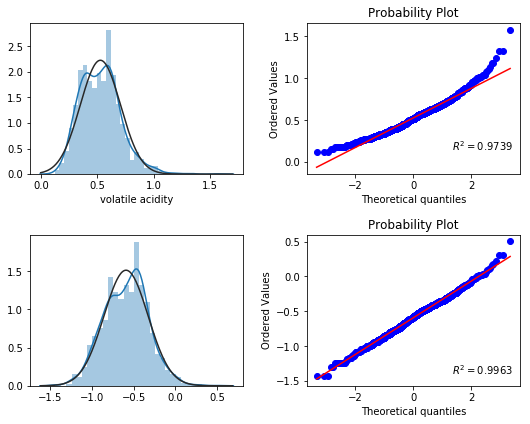

______________________________________________________________________
variable name:  citric acid


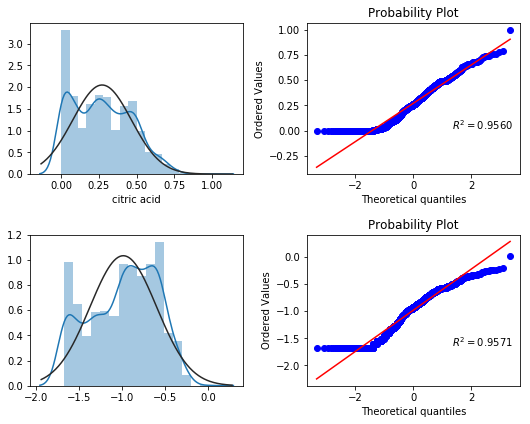

______________________________________________________________________
variable name:  residual sugar


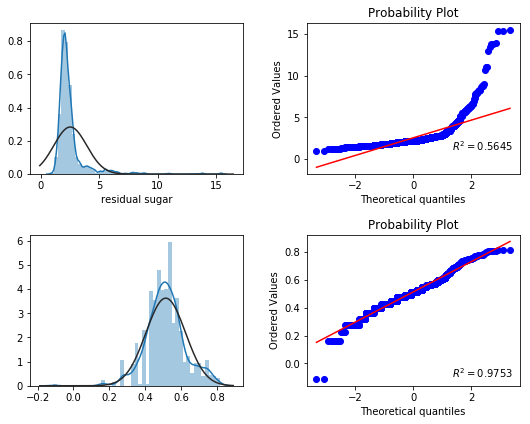

______________________________________________________________________
variable name:  chlorides


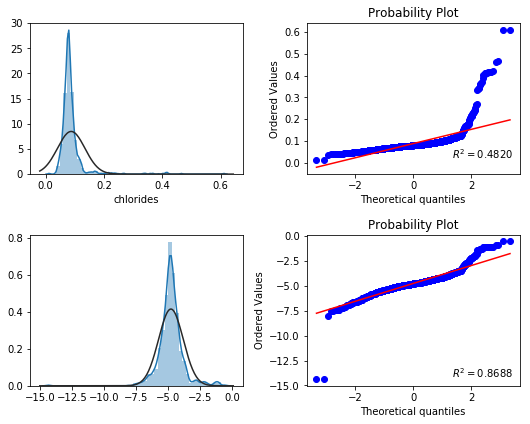

______________________________________________________________________
variable name:  free sulfur dioxide


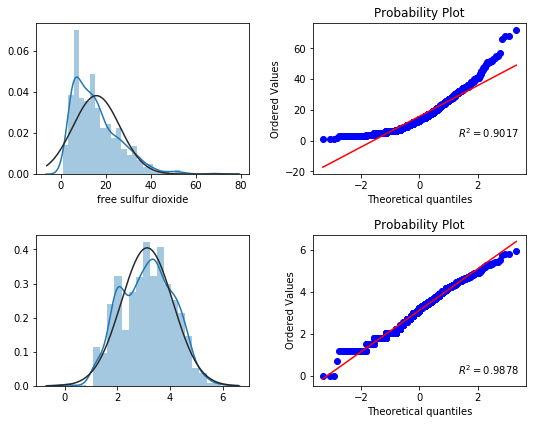

______________________________________________________________________
variable name:  total sulfur dioxide


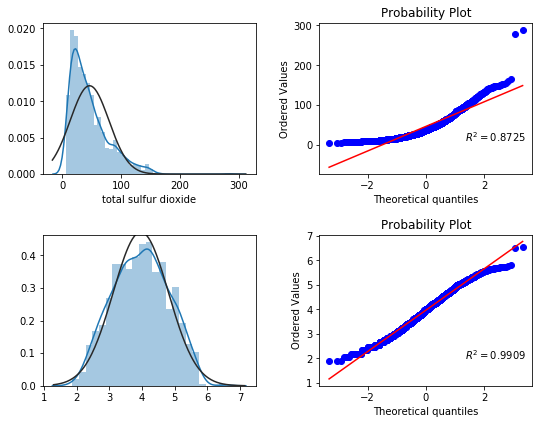

______________________________________________________________________
variable name:  density


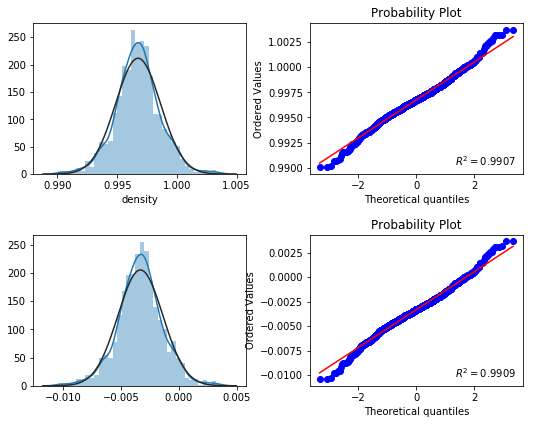

______________________________________________________________________
variable name:  pH


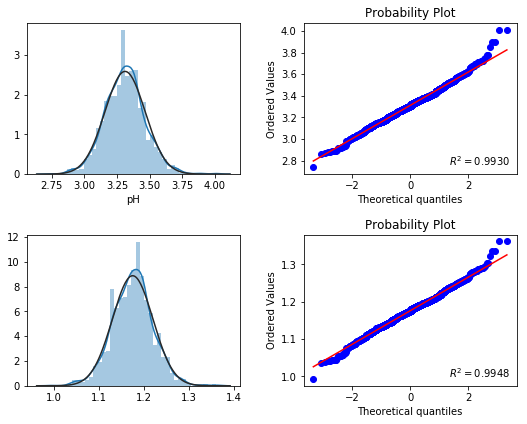

______________________________________________________________________
variable name:  sulphates


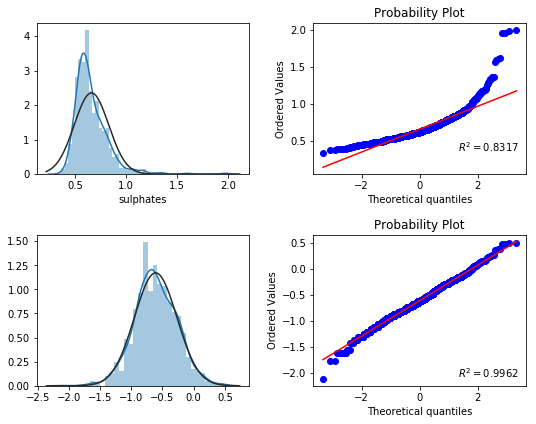

______________________________________________________________________
variable name:  alcohol


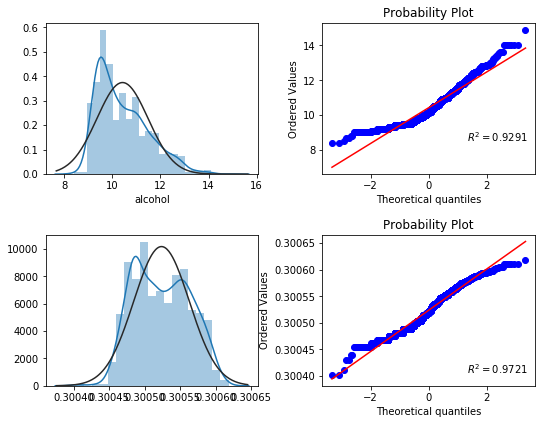

In [12]:
# To test the Statistical Assumptions on Continuous variables: We Check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in df.columns[:-1]:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.01
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()